In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
url = "Iris.csv"
iris_data = pd.read_csv(url)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_data.shape

(150, 6)

In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

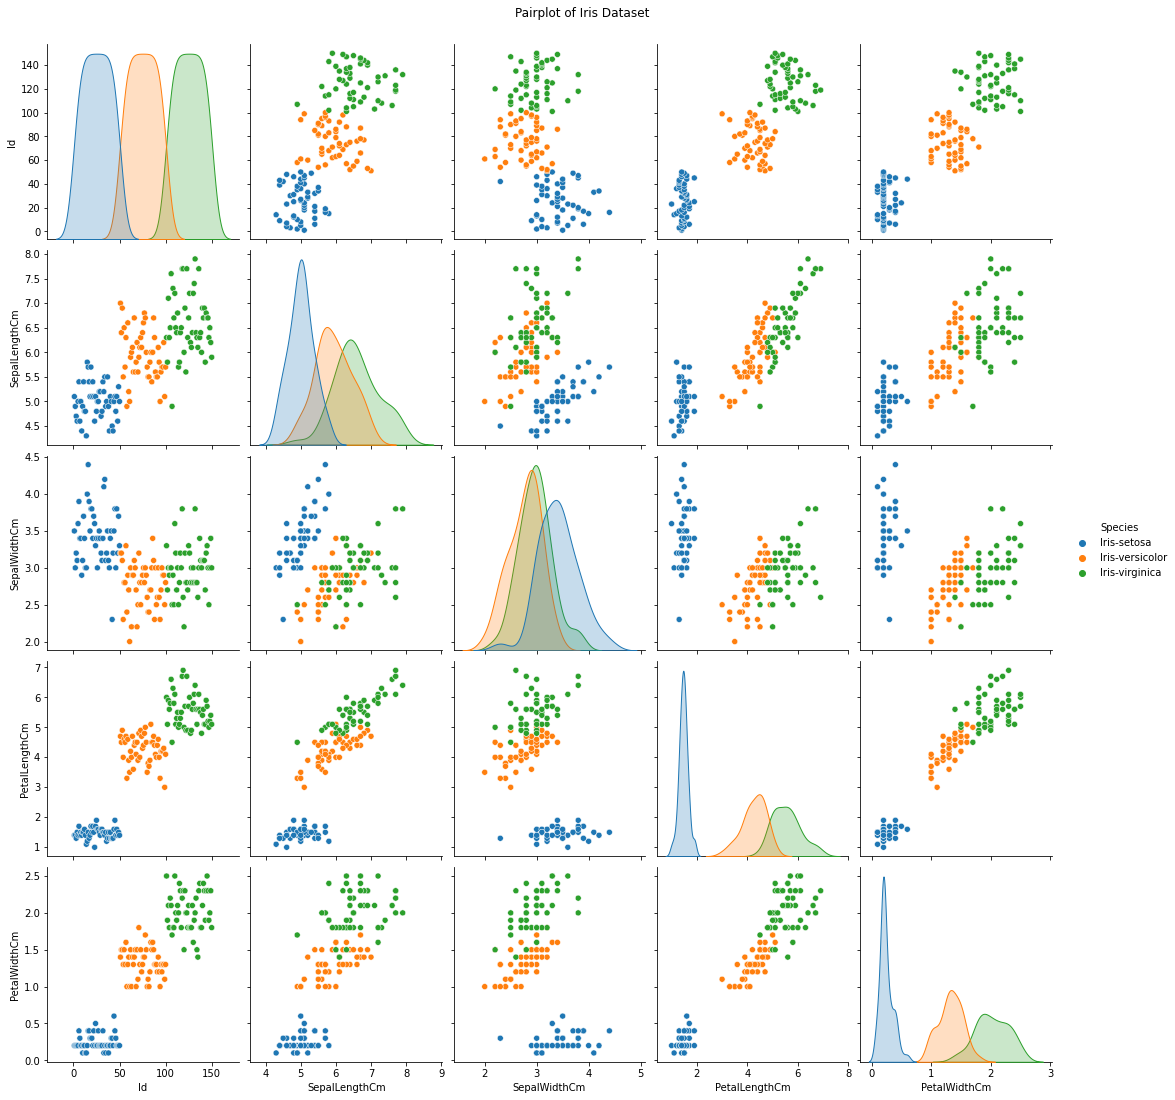

In [12]:
sns.pairplot(iris_data, hue='Species', height=3)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

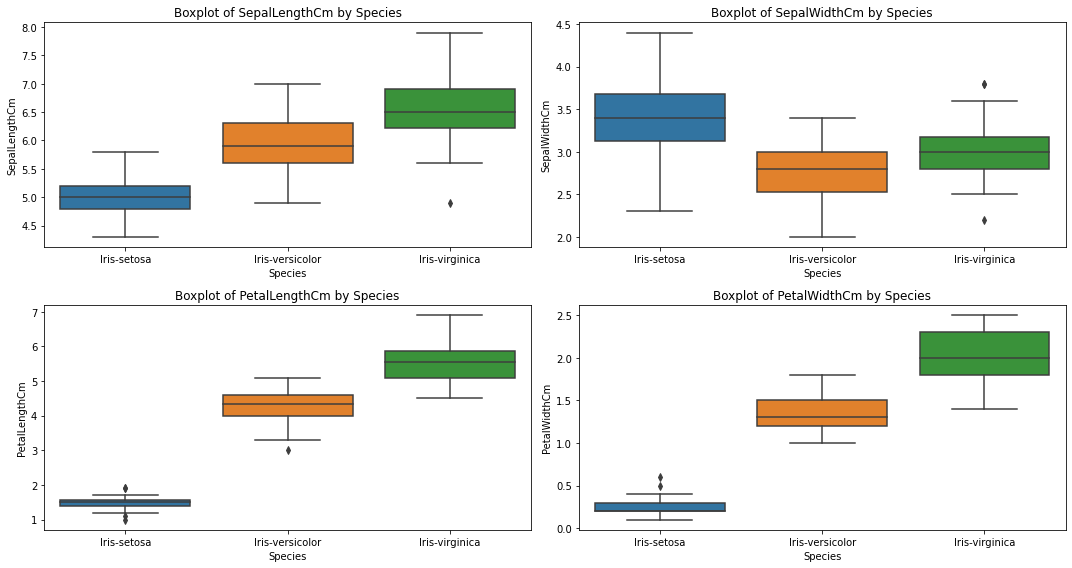

In [13]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(iris_data.columns[1:-1]):  # Exclude 'Id' and 'Species'
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=iris_data)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px
iris_data.columns = ['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
fig = px.scatter_3d(iris_data, x='SepalLength', y='SepalWidth', z='PetalLength',
                    color='Species', symbol='Species',
                    title='3D Scatter Plot of Iris Features')
fig.show()

In [15]:
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knn_model.predict(X_test_scaled)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100,"%")

Accuracy:  100.0 %


In [20]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [21]:
print('\nConfusion Matrix:')
confusion_matrix(y_test, y_pred)


Confusion Matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [23]:
import plotly.express as px
y_categorical = pd.Categorical(y, categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y_categorical, title='PCA of Iris Dataset',
                 labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
                 category_orders={'color': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
fig.show()


c:\Users\bhuva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



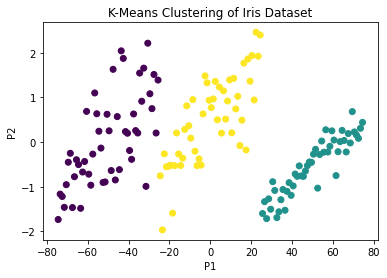

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print('Best Parameters:', grid_search.best_params_)


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}


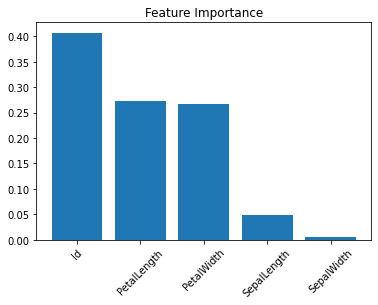

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.title('Feature Importance')
plt.show()
